<a href="https://colab.research.google.com/github/Nov05/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/DS_Unit_1_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# modified by nov05 on 2019-06-14

In [0]:
from scipy import stats 
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import altair as alt

from IPython.display import display, Image
from google.colab import files

%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# import warnings
# warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='once')

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
# TODO
url_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data"
url_names = "https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names"

In [10]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names


1. Title: Credit Approval

2. Sources: 
    (confidential)
    Submitted by quinlan@cs.su.oz.au

3.  Past Usage:

    See Quinlan,
    * "Simplifying decision trees", Int J Man-Machine Studies 27,
      Dec 1987, pp. 221-234.
    * "C4.5: Programs for Machine Learning", Morgan Kaufmann, Oct 1992
  
4.  Relevant Information:

    This file concerns credit card applications.  All attribute names
    and values have been changed to meaningless symbols to protect
    confidentiality of the data.
  
    This dataset is interesting because there is a good mix of
    attributes -- continuous, nominal with small numbers of
    values, and nominal with larger numbers of values.  There
    are also a few missing values.
  
5.  Number of Instances: 690

6.  Number of Attributes: 15 + class attribute

7.  Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z

In [8]:
my_data = pd.read_csv(url_data, header=None)
print(my_data.shape) # (690, 15)
my_data.head()

(690, 16)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [49]:
# rename columns
names = ['A'+str(x) for x in range(1,17)]
my_data.columns = names
my_data.head(1)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.0,u,g,w,v,1.25,t,t,1,f,g,00202,0,+


In [31]:
my_data.replace(to_replace='?', value=np.nan, inplace=True)
my_data[my_data['A3']==0].head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.0,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
56,b,23.17,0.0,u,g,cc,v,0.085,t,f,0,f,g,00000,0,+
171,b,41.33,0.0,u,g,c,bb,15.000,t,f,0,f,g,00000,0,+
206,a,71.58,0.0,NaN,NaN,NaN,NaN,0.000,f,f,0,f,p,NaN,0,+
257,b,20.00,0.0,u,g,d,v,0.500,f,f,0,f,g,00144,0,-


In [53]:
# check NAs
my_data.isna().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [55]:
# describe numeric values
my_data.describe()

,A3,A8,A11,A15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [56]:
# describe non-numeric values
my_data.describe(exclude=np.number)

,A1,A2,A4,A5,A6,A7,A9,A10,A12,A13,A14,A16
count,678,678,684,684,681,681,690,690,690,690,677,690
unique,2,349,3,3,14,9,2,2,2,3,170,2
top,b,22.67,u,g,c,v,t,f,f,g,00000,-
freq,468,9,519,519,137,399,361,395,374,625,132,383


**Missing Attribute Values:**  
    37 cases (5%) have one or more missing values.  
    The missing values from particular attributes are:

    A1:  12
    A2:  12
    A4:   6
    A5:   6
    A6:   9
    A7:   9
    A14: 13

In [59]:
# those non-numeric columns have missing values
# marked as np.nan, verified
cols = ['A1', 'A2', 'A4', 'A5', 'A6', 'A7', 'A14']
my_data[cols].isna().sum()

A1     12
A2     12
A4      6
A5      6
A6      9
A7      9
A14    13
dtype: int64

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that **A16 is the class label**. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [63]:
# split data by class
class1 = my_data[my_data['A16']=='+']
class2 = my_data[my_data['A16']=='-']
class1.head(2)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.00,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,00043,560,+


### 2-sample t-test

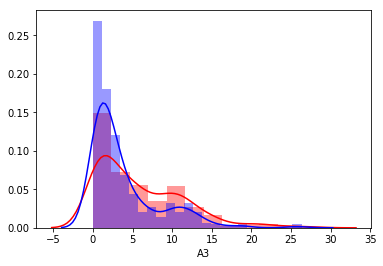

In [70]:
# TODO
# A3 is continous
sns.distplot(class1['A3'], color='r')
sns.distplot(class2['A3'], color='b');

In [78]:
stats.levene(class1['A3'], class2['A3'], 
             center='median')

LeveneResult(statistic=24.891538482377484, pvalue=7.689474674761265e-07)

In [77]:
stats.levene(class1['A3'], class2['A3'], 
             center='mean') # default 'median'

LeveneResult(statistic=26.42730448461563, pvalue=3.5704502554627907e-07)

In [86]:
print('mean:', class1['A3'].mean(), class2['A3'].mean())
print('median:', class1['A3'].median(), class2['A3'].median())
print('sample count:', len(class1['A3']), len(class2['A3']))
print(ttest_ind(class1['A3'], class2['A3'], 
                equal_var=True, nan_policy='omit'))
print(ttest_ind(class1['A3'], class2['A3'], 
                equal_var=False, nan_policy='omit')) # important
t_stats = ((class1['A3'].mean() - class2['A3'].mean()) 
          / np.sqrt((class1['A3'].var(ddof=1)/len(class1['A3'])) 
          + (class2['A3'].var(ddof=1)/len(class2['A3'])))
     )
print('t-statistic:', t_stats)

mean: 5.904951140065144 3.839947780678851
median: 4.46 2.21
sample count: 307 383
Ttest_indResult(statistic=5.52998337614816, pvalue=4.551680702308068e-08)
Ttest_indResult(statistic=5.392530906223675, pvalue=1.0158807568737146e-07)
t-statistic: 5.392530906223664


In [88]:
# 2-sample t-test for all continous value columns
for col in ['A3', 'A8', 'A11', 'A15']:
  print('attribute:', col)
  print('mean:', class1[col].mean(), class2[col].mean())
  print('median:', class1[col].median(), class2[col].median())
  print('sample count:', len(class1[col]), len(class2[col]))
  print(ttest_ind(class1[col], class2[col], 
                  equal_var=True, nan_policy='omit'))
  print(ttest_ind(class1[col], class2[col], 
                  equal_var=False, nan_policy='omit')) # important
  t_stats = ((class1[col].mean() - class2[col].mean()) 
            / np.sqrt((class1[col].var(ddof=1)/len(class1[col])) 
            + (class2[col].var(ddof=1)/len(class2[col])))
       )
  print('t-statistic:', t_stats, '\n')

attribute: A3
mean: 5.904951140065144 3.839947780678851
median: 4.46 2.21
sample count: 307 383
Ttest_indResult(statistic=5.52998337614816, pvalue=4.551680702308068e-08)
Ttest_indResult(statistic=5.392530906223675, pvalue=1.0158807568737146e-07)
t-statistic: 5.392530906223664 

attribute: A8
mean: 3.427899022801302 1.2579242819843346
median: 2.0 0.415
sample count: 307 383
Ttest_indResult(statistic=8.935819983773698, pvalue=3.6710537401601785e-18)
Ttest_indResult(statistic=8.38006008674286, pvalue=7.425348666782441e-16)
t-statistic: 8.380060086742857 

attribute: A11
mean: 4.605863192182411 0.6318537859007833
median: 3.0 0.0
sample count: 307 383
Ttest_indResult(statistic=11.667004222431277, pvalue=7.957718568079967e-29)
Ttest_indResult(statistic=10.6384190682749, pvalue=4.310254123415665e-23)
t-statistic: 10.638419068274906 

attribute: A15
mean: 2038.85993485342 198.60574412532637
median: 221.0 1.0
sample count: 307 383
Ttest_indResult(statistic=4.680216020964486, pvalue=3.4520256956

### Chi-squre test

**Attribute Information:**

    A1:	b, a.  
    A2:	continuous.  
    A3:	continuous.  
    A4:	u, y, l, t.  
    A5:	g, p, gg.  
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.  
    A7:	v, h, bb, j, n, z, dd, ff, o.  
    A8:	continuous.  
    A9:	t, f.  
    A10:	t, f.  
    A11:	continuous.  
    A12:	t, f.  
    A13:	g, p, s.  
    A14:	continuous.  
    A15:	continuous.  
    A16: +,-         (class attribute)  

In [0]:
# categorical attributes
cols = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

In [97]:
observed = pd.crosstab(my_data['A4'].dropna(), 
                       my_data['A5'].dropna()).values
observed

array([[  0,   2,   0],
       [519,   0,   0],
       [  0,   0, 163]])

In [99]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print(f"Chi-squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-squared: 1368.0
P-value: 6.001571019304877e-295
Degrees of freedom: 4
Expected: 
 [[1.51754386e+00 5.84795322e-03 4.76608187e-01]
 [3.93802632e+02 1.51754386e+00 1.23679825e+02]
 [1.23679825e+02 4.76608187e-01 3.88435673e+01]]


In [102]:
i = 1
for c1 in cols:
  for c2 in cols[i:]:
    observed = pd.crosstab(my_data[c1].dropna(), 
                       my_data[c2].dropna()).values
    chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
    print('Attributes:', c1, c2)
    print(f"Chi-squared: {chi_squared}")
    print(f"P-value: {p_value}")
    print(f"Degrees of freedom: {dof}") 
    print("Expected: \n", np.array(expected))
    print(); print()

Attributes: A1 A4
Chi-squared: 3.552518728408426
P-value: 0.16927014245378488
Degrees of freedom: 2
Expected: 
 [[  0.61904762 158.16666667  49.21428571]
 [  1.38095238 352.83333333 109.78571429]]


Attributes: A1 A5
Chi-squared: 3.552518728408426
P-value: 0.16927014245378488
Degrees of freedom: 2
Expected: 
 [[158.16666667   0.61904762  49.21428571]
 [352.83333333   1.38095238 109.78571429]]


Attributes: A1 A6
Chi-squared: 86.3123367641298
P-value: 7.057474341497169e-13
Degrees of freedom: 13
Expected: 
 [[16.42921013 41.84798808 12.39940387  9.29955291  7.43964232 16.42921013
  17.97913562  3.09985097 15.49925484 11.77943368 23.55886736  0.92995529
  19.5290611  11.77943368]
 [36.57078987 93.15201192 27.60059613 20.70044709 16.56035768 36.57078987
  40.02086438  6.90014903 34.50074516 26.22056632 52.44113264  2.07004471
  43.4709389  26.22056632]]


Attributes: A1 A7
Chi-squared: 30.971930656869876
P-value: 0.00014212870614743197
Degrees of freedom: 8
Expected: 
 [[ 17.66915052   1.

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

*Your words here!*